import Importing neede libraries for preprocessing and model budiling 



In [26]:
import nltk
import io
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
nltk.download('punkt') # one time execution
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
!pip install googletrans==3.1.0a0
from googletrans import Translator, constants
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#import of standford data set 
# this code was seperated from the main import block because it takes so long to run 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2021-04-28 02:50:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-28 02:50:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-28 02:50:03--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

read in dataset and look at it 

In [7]:
# this mehtod of reading in text works better for full text files 
# other method to read in articles 
txt = "/content/drive/MyDrive/KDM Project/datasets/HarryPotter.txt"

# opening and converting read in files to use able form 
txt = open(txt, "r")
text_sring = txt.read()
print(type(text_sring))
print(text_sring)


<class 'str'>
LOCK HAVEN, PA—Ashley Daniels is as close as you can get to your typical 9-year-old American girl. A third-grader at Lock Haven Elementary School, she loves rollerblading, her pet hamsters Benny and Oreo, Britney Spears, and, of course, Harry Potter. Having breezed through the most recent Potter opus in just four days, Ashley is among the millions of children who have made Harry Potter And The Goblet Of Fire the fastest-selling book in publishing history. And, like many of her school friends, Ashley was captivated enough by the strange occult doings at the Hogwarts School Of Witchcraft And Wizardry to pursue the Left-Hand Path, determined to become as adept at the black arts as Harry and his pals. "I used to believe in what they taught us at Sunday School," said Ashley, conjuring up an ancient spell to summon Cerebus, the three-headed hound of hell. "But the Harry Potter books showed me that magic is real, something I can learn and use right now, and that the Bible is not

In [8]:
# remove punctuations, numbers and special characters
sentences = text_sring.split('.') 
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
clean_sentences = [s.lower() for s in clean_sentences]

#remove stopwords from the sentences
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
print(clean_sentences)

['lock pa ashley daniels close get typical year old american girl', 'third grader lock elementary school loves rollerblading pet hamsters benny oreo britney spears course harry potter', 'breezed recent potter opus four days ashley among millions children made harry potter goblet fire fastest selling book publishing history', 'like many school friends ashley captivated enough strange occult doings hogwarts school witchcraft wizardry pursue left hand path determined become adept black arts harry pals', 'used believe taught us sunday school said ashley conjuring ancient spell summon cerebus three headed hound hell', 'harry potter books showed magic real something learn use right bible nothing boring lies', 'ashley hardly child rejecting god days', 'weeks release goblet fourth book j', 'k', 'rowling blockbuster kid lit series interest witchcraft continues skyrocket among children', 'across america satanic temples filling rafters youngsters clamoring instruction summoning conjuring', 'prote

In [9]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.200d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [10]:
sentence_vectors = []
for sentence  in clean_sentences:
    if len(sentence) != 0:
        v = sum([word_embeddings.get(word, np.zeros((200,))) for word in sentence.split()])/(len(sentence.split())+0.0001)
    else:
        v = np.zeros((200,))
    sentence_vectors.append(v)

In [11]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j: #ignore if both are same sentences
        sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,200), sentence_vectors[j].reshape(1,200))[0,0]

In [38]:
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)


clound_sentences = " "  
print("the total number of sentences is", len(sentences))
print("the total number of sentences is", len(ranked_sentences))
cosSim=[]
# Extract top 5 sentences for word cloud
for i in range(0,5):
  print("--------------")
  print("ranked senctence number", i)
  print(ranked_sentences[i][0])
  print("cosine score" , ranked_sentences[i])
  clound_sentences += ranked_sentences[i][1]

#Extract cosine score for all sentences for graphical purposes:
for i in range(len(ranked_sentences)):
  cosSim.append(ranked_sentences[i][0])

the total number of sentences is 44
the total number of sentences is 44
--------------
ranked senctence number 0
0.0276307565578433
cosine score (0.0276307565578433, ' "The Harry Potter books are cool, \'cause they teach you all about magic and how you can use it to control people and get revenge on your enemies," said Hartland, WI, 10-year-old Craig Nowell, a recent convert to the New Satanic Order Of The Black Circle')
--------------
ranked senctence number 1
0.027309708632441285
cosine score (0.027309708632441285, '" But as wild as children are about Harry, no one is happier about the phenomenon than old-school Satanists, who were struggling to recruit new members prior to the publication of the first Potter book in 1997')
--------------
ranked senctence number 2
0.02682726932899213
cosine score (0.02682726932899213, ' "But the Harry Potter books showed me that magic is real, something I can learn and use right now, and that the Bible is nothing but boring lies')
--------------
rank

(-0.5, 399.5, 199.5, -0.5)

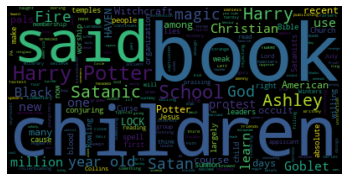

In [22]:
# word clounds for original text 
wordCloud = WordCloud().generate(text_sring)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

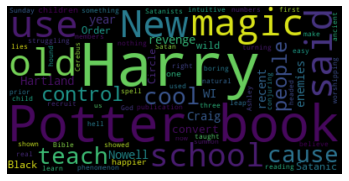

In [23]:
# clound for ranked sentences 
wordCloud = WordCloud().generate(clound_sentences)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis("off")

In [24]:
translator = Translator() #Google API translator
#Translates automatically from spanish to english, to translate differentlanguage, 
#translator.translate("Phrase", dest = "language code")

translation = translator.translate(clound_sentences, dest = "fr")
print(f"{translation.origin} ({translation.src}) --> {translation.text}({translation.dest})")

  "The Harry Potter books are cool, 'cause they teach you all about magic and how you can use it to control people and get revenge on your enemies," said Hartland, WI, 10-year-old Craig Nowell, a recent convert to the New Satanic Order Of The Black Circle" But as wild as children are about Harry, no one is happier about the phenomenon than old-school Satanists, who were struggling to recruit new members prior to the publication of the first Potter book in 1997 "But the Harry Potter books showed me that magic is real, something I can learn and use right now, and that the Bible is nothing but boring lies The natural, intuitive leap from reading a Harry Potter book to turning against God and worshipping Satan is very easy for a child to make, as the numbers have shown "I used to believe in what they taught us at Sunday School," said Ashley, conjuring up an ancient spell to summon Cerebus, the three-headed hound of hell (en) --> "Les livres de Harry Potter sont cool, car ils vous apprennen

Text(0.5, 1.0, 'Cosine Similarity of All Sentences')

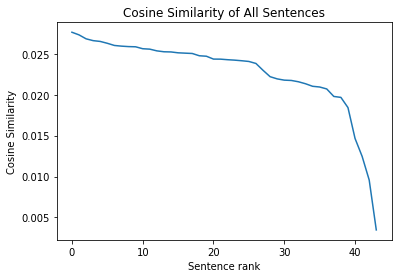

In [49]:
plt.plot(cosSim)
plt.xlabel("Sentence rank")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity of All Sentences")

In [25]:
# looks like the tuples includes the simmularity score 
print(type(ranked_sentences))
print(len(ranked_sentences))
print(type(ranked_sentences[1]))
print(ranked_sentences[6])

<class 'list'>
44
<class 'tuple'>
(0.026016409830163317, ' "I think it\'s absolute rubbish to protest children\'s books on the grounds that they are luring children to Satan,"Rowling told a London Times reporter in a July 17 interview')
